In [288]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pylab as plt

In [289]:
df = pd.read_csv('notas.csv',sep=';')
df

,noise,matricula,id_turma,nome,siape,concat,id_situacao_matricula,descricao,media_final
0,500,2635915545,438,ELABORAÇÃO DE PROJETOS CULTURAIS,1314589,Refugio Schneider,4,APROVADO,8.0
1,443,2188096962,447,METODOLOGIA DO TRABALHO CIENTÍFICO,2485385,Ammon Schmeler,4,APROVADO,10.0
2,485,2084846937,440,ESTUDO DE MERCADO INFORMACIONAL,2687965,Silvia Willms,4,APROVADO,9.5
3,404,1773301533,442,FUNDAMENTOS TEÓRICOS DA INFORMAÇÃO,2960275,Silvia Willms,4,APROVADO,9.5
4,453,2098470832,446,MEMÓRIA ORGANIZACIONAL: ASPECTOS TÉCNICOS E PR...,1862817,Kalie Bosco,4,APROVADO,8.5
...,...,...,...,...,...,...,...,...,...
354896,11203,2536402992,17580,ESTUDOS SOCIOLÓGICOS E ANTROPOLÓGICOS,1280285,Gena Nienow,4,APROVADO,8.8
354897,11374,2567259177,18020,INTRODUCAO A FILOSOFIA,1526217,Allena Pacocha,4,APROVADO,9.5
354898,12356,1792060888,18019,ANTROPOLOGIA FILOSOFICA,1742202,Aiyana Brown,4,APROVADO,10.0
354899,12588,2273057259,18018,LOGICA I,1271204,Melinda Jast,4,APROVADO,7.0


In [290]:
df.descricao.unique()

array(['APROVADO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS',
       'REPROVADO POR FALTAS'], dtype=object)

In [291]:
leFe = preprocessing.LabelEncoder()
leFe.fit(df['concat'])
leFe.transform(df['concat'])
df['concat'] = leFe.transform(df['concat'])
leFeD = preprocessing.LabelEncoder()
leFeD.fit(df['descricao'])
leFeD.transform(df['descricao'])
df['descricao'] = leFeD.transform(df['descricao'])
leFeD.inverse_transform(df['descricao'].unique())

array(['APROVADO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS',
       'REPROVADO POR FALTAS'], dtype=object)

In [292]:
X = df[["concat", "media_final","descricao"]]


In [293]:
X = X.fillna(0).copy()
X

,concat,media_final,descricao
0,479,8.0,0
1,24,10.0,0
2,522,9.5,0
3,522,9.5,0
4,312,8.5,0
...,...,...,...
354896,209,8.8,0
354897,15,9.5,0
354898,10,10.0,0
354899,405,7.0,0


In [294]:
kmeans = KMeans(n_clusters=2, init='random').fit(X)

In [295]:
s = pd.Series(kmeans.labels_)
s.value_counts()


1    183050
0    171851
dtype: int64

In [296]:
X["resposta"] = s
X.concat = leFe.inverse_transform(X.concat)
#X.descricao = leFeD.inverse_transform(X.descricao)
X

,concat,media_final,descricao,resposta
0,Refugio Schneider,8.0,0,1
1,Ammon Schmeler,10.0,0,0
2,Silvia Willms,9.5,0,1
3,Silvia Willms,9.5,0,1
4,Kalie Bosco,8.5,0,1
...,...,...,...,...
354896,Gena Nienow,8.8,0,0
354897,Allena Pacocha,9.5,0,0
354898,Aiyana Brown,10.0,0,0
354899,Melinda Jast,7.0,0,1


In [297]:
X.query("concat==4")

,concat,media_final,descricao,resposta


In [298]:
agrupados = X.groupby(['concat']).mean()
agrupados.reset_index(inplace=True)

In [299]:
agrupados.query("resposta==1 and media_final>7")

,concat,media_final,descricao,resposta
295,Jon Walker,8.193673,0.090784,1
296,Jonah Terry,8.258490,0.011236,1
299,Josefita Hessel,8.586232,0.028986,1
301,Joslyn Schumm,8.580342,0.051282,1
302,Jovanny Gutmann,7.705596,0.215328,1
...,...,...,...,...
577,Yoel Mann,7.606103,0.045845,1
578,Young Fahey,7.386353,0.217391,1
579,Yvette Pfannerstill,7.610274,0.383562,1
580,Yvette Thompson,7.700000,0.064401,1


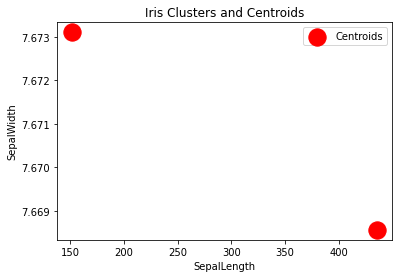

In [300]:
#plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()

# VERSÃO 2

In [301]:
clusters = KMeans(n_clusters = 3, init = 'random')
dados = agrupados[['media_final','descricao']]
clusters.fit(dados)


KMeans(init='random', n_clusters=3)

In [302]:
s = pd.Series(clusters.labels_)
s.value_counts()

2    270
0    239
1     73
dtype: int64

In [303]:
dados["classificacao"] = s

/tmp/ipykernel_136017/1084416638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["classificacao"] = s


In [308]:
dados.query("classificacao==1")

,media_final,descricao,classificacao
4,4.496657,0.474164,1
9,4.921622,0.675676,1
17,5.344309,0.841463,1
20,6.293827,0.129630,1
21,5.519718,0.549296,1
...,...,...,...
547,6.193175,0.430267,1
548,5.952837,0.607565,1
553,5.121244,0.435233,1
557,5.254717,0.622642,1


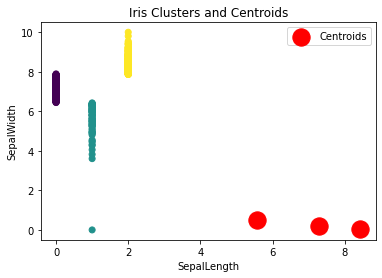

In [310]:
plt.scatter(dados.classificacao, dados.media_final, c = clusters.labels_)
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()

In [311]:
dados["docente"] = agrupados["concat"]

In [315]:
dados.query("classificacao==2")

,media_final,descricao,classificacao,docente
0,8.195891,0.018626,2,Aarav Bernhard
2,7.867213,0.000000,2,Adelia Kreiger
5,8.843333,0.000000,2,Agatha Russel
8,8.304185,0.028487,2,Agusta Turner
11,8.619167,0.100000,2,Aldona Tromp
...,...,...,...,...
569,8.615602,0.016917,2,Vidal Wolff
571,8.445368,0.012281,2,Virge Kunde
572,8.464286,0.142857,2,Virge Wintheiser
575,7.998182,0.309091,2,Wood Kuphal
